In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("train.csv")
air = pd.DataFrame(df["CentralAir"])
price = pd.DataFrame(df["SalePrice"])


price_train, price_test, air_train, air_test = split(price, air, test_size=0.2, random_state=42)

,SalePrice
count,1168.000000
mean,181441.541952
std,77263.583862
min,34900.000000
25%,130000.000000
50%,165000.000000
75%,214925.000000
max,745000.000000


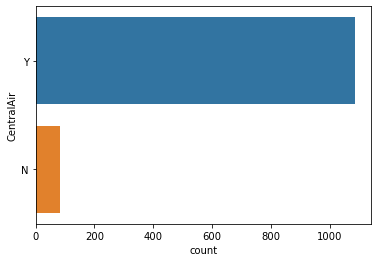

In [4]:
sb.countplot(data=air_train, y="CentralAir")
price_train.describe()

<AxesSubplot:>

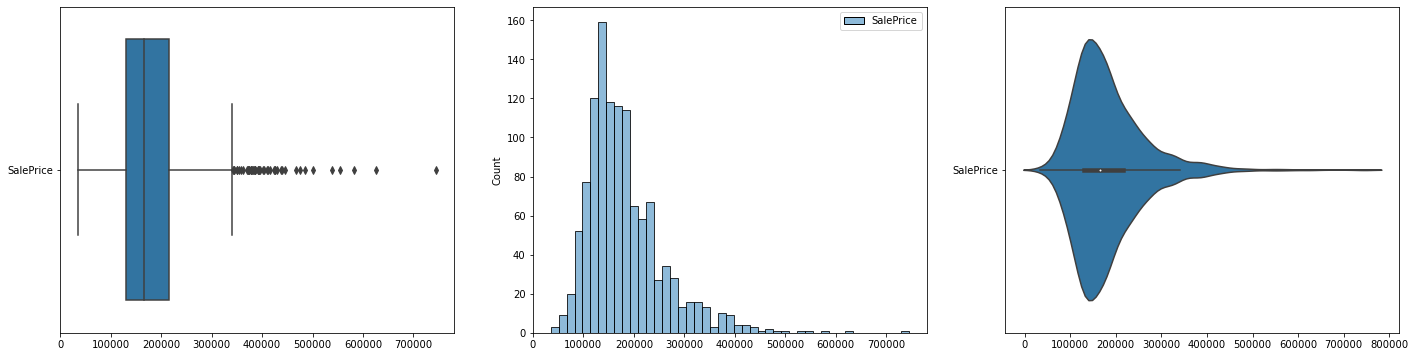

In [5]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sb.boxplot(data = price_train, orient = "h", ax = axes[0])
sb.histplot(data = price_train, ax = axes[1])
sb.violinplot(data = price_train, orient = "h", ax = axes[2])

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

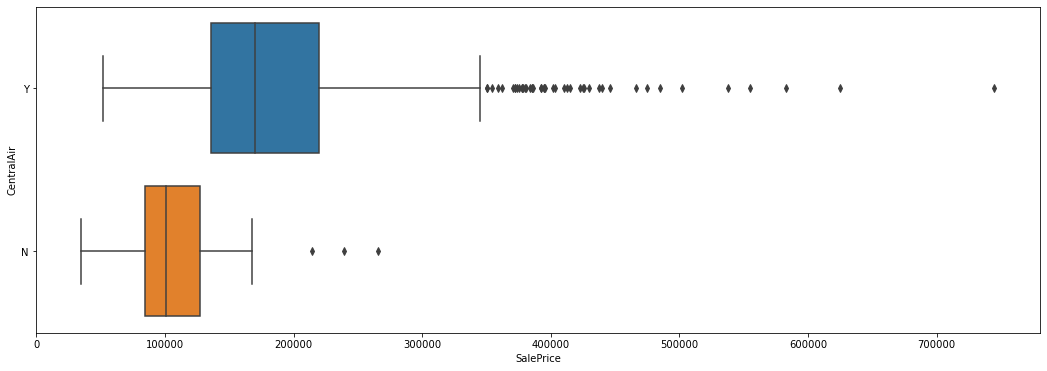

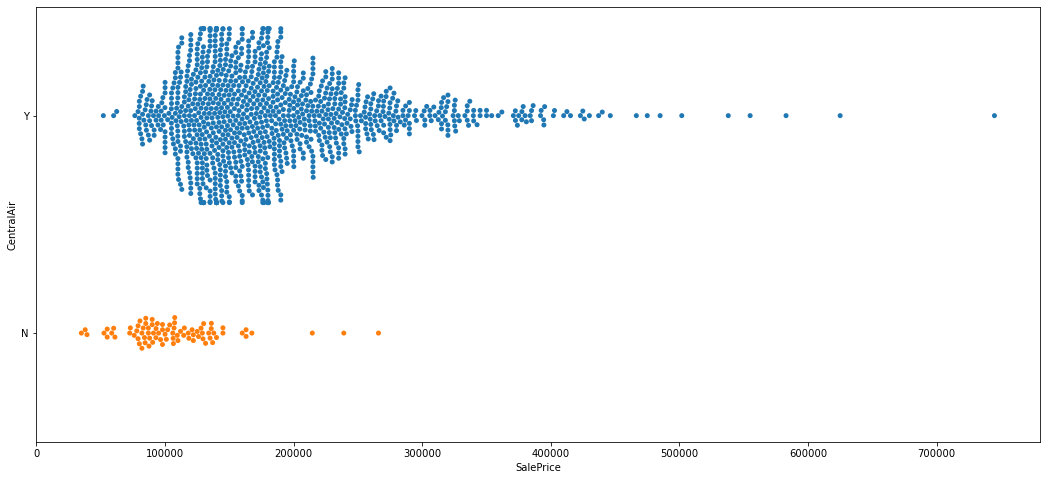

In [6]:

trainDF = pd.concat([price_train, air_train], axis = 1).reindex(price_train.index)

f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")
f = plt.figure(figsize=(18, 8))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h",size=5)

[Text(334.8, 543.6, 'SalePrice <= 107750.0\ngini = 0.132\nsamples = 1168\nvalue = [83, 1085]\nclass = True'),
 Text(167.4, 326.16, 'SalePrice <= 79450.0\ngini = 0.486\nsamples = 120\nvalue = [50, 70]\nclass = True'),
 Text(83.7, 108.72000000000003, 'gini = 0.375\nsamples = 20\nvalue = [15, 5]\nclass = False'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.455\nsamples = 100\nvalue = [35, 65]\nclass = True'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.061\nsamples = 1048\nvalue = [33, 1015]\nclass = True'),
 Text(418.5, 108.72000000000003, 'gini = 0.175\nsamples = 237\nvalue = [23, 214]\nclass = True'),
 Text(585.9, 108.72000000000003, 'gini = 0.024\nsamples = 811\nvalue = [10, 801]\nclass = True')]

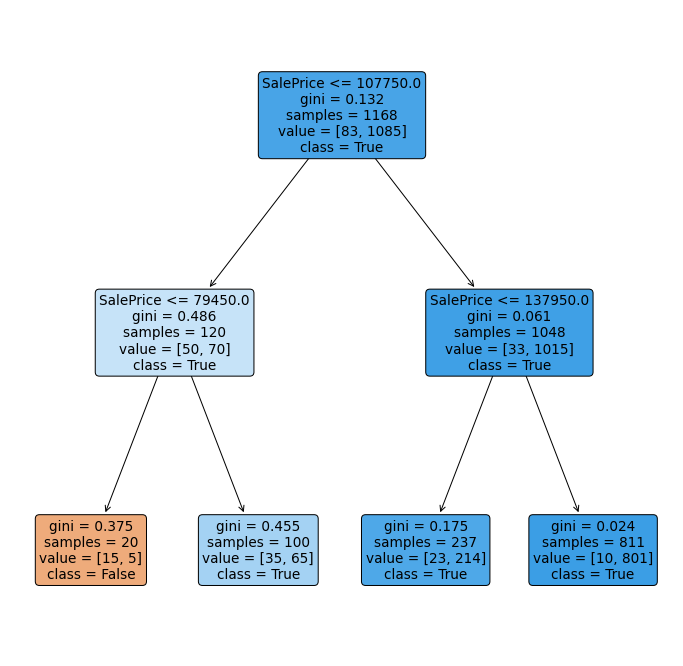

In [9]:
dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(price_train, air_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["False", "True"])

Train Accuracy 	: 0.9375
Test Accuracy 	: 0.958904109589041
False positive rate: 0.5
False negative rate: 0.02142857142857143


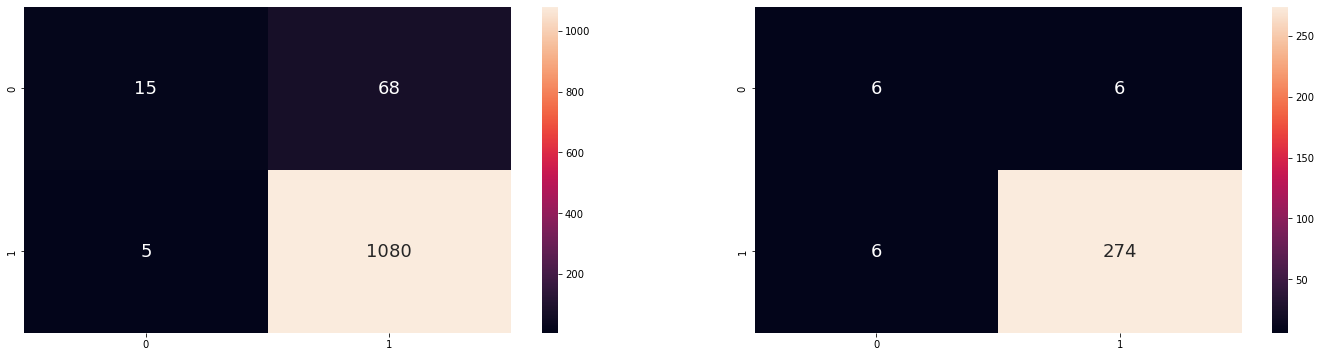

In [10]:
air_train_pred = dectree.predict(price_train)
air_test_pred = dectree.predict(price_test)

f, axes = plt.subplots(1, 2, figsize=(24, 6))

print("Train Accuracy \t:", dectree.score(price_train, air_train))
sb.heatmap(confusion_matrix(air_train, air_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[0])

print("Test Accuracy \t:", dectree.score(price_test, air_test))
matrix = confusion_matrix(air_test, air_test_pred)
sb.heatmap(matrix, 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[1])

print("False positive rate: {}".format(matrix[0][1]/(matrix[0][1]+matrix[0][0])))
print("False negative rate: {}".format(matrix[1][0]/(matrix[1][0]+matrix[1][1])))

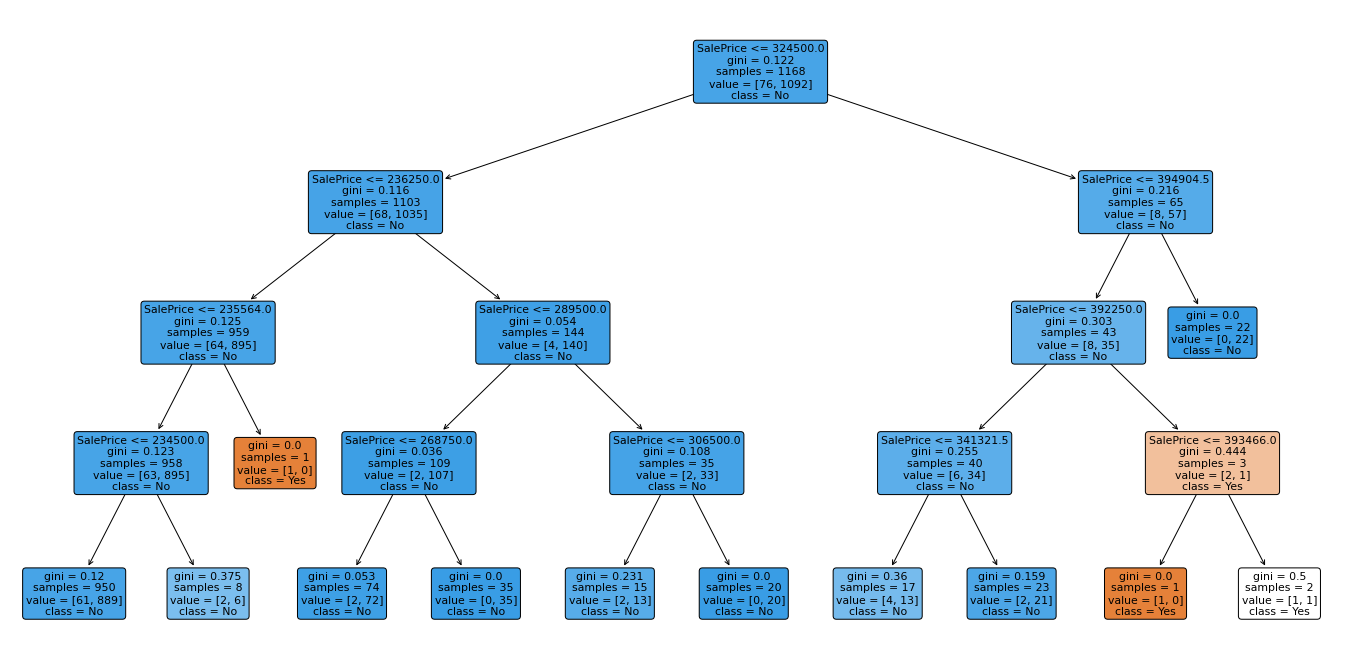

In [15]:
dectree4 = DecisionTreeClassifier(max_depth = 4)
dectree4.fit(price_train, air_train)

f = plt.figure(figsize=(24,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["False", "True"])

price_spc, air_spc = price_train, air_train

Train Accuracy 	: 0.9417808219178082
Test Accuracy 	: 0.9486301369863014
False positive rate: 0.021660649819494584
False negative rate: 0.6


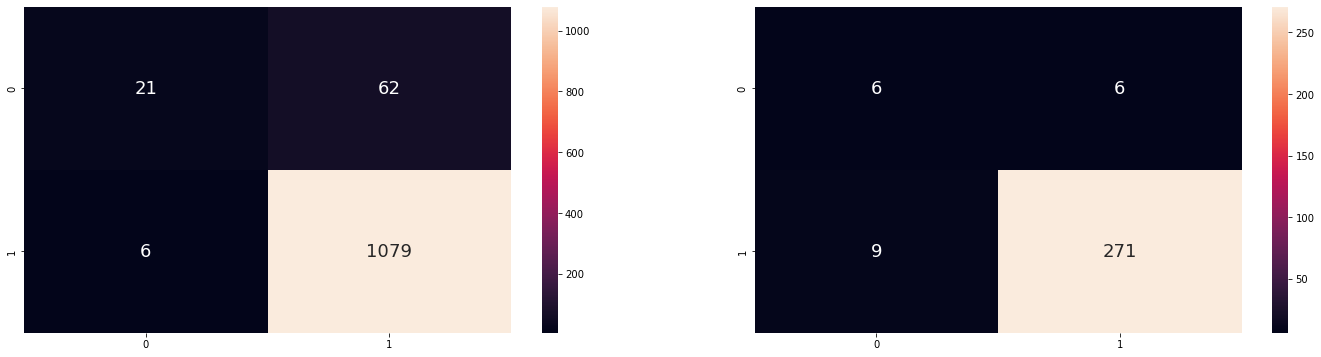

In [9]:
air_train_pred = dectree4.predict(price_train)
air_test_pred = dectree4.predict(price_test)

f, axes = plt.subplots(1, 2, figsize=(24, 6))

print("Train Accuracy \t:", dectree4.score(price_train, air_train))
sb.heatmap(confusion_matrix(air_train, air_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[0])

print("Test Accuracy \t:", dectree4.score(price_test, air_test))
matrix = confusion_matrix(air_test, air_test_pred)
sb.heatmap(matrix, 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[1])

print("False positive rate: {}".format(matrix[0][1]/(matrix[0][1]+matrix[1][1])))
print("False negative rate: {}".format(matrix[1][0]/(matrix[1][0]+matrix[0][0])))

# Qn 2

Metrics for OverallQual: 
Train Accuracy 	: 0.9375
Test Accuracy 	: 0.9486301369863014
False positive rate: 0.04844290657439446
False negative rate: 0.3333333333333333
---------------------------------------------------------------------------------------------------------------------
Metrics for YearBuilt: 
Train Accuracy 	: 0.940068493150685
Test Accuracy 	: 0.9212328767123288
False positive rate: 0.07291666666666667
False negative rate: 0.5
---------------------------------------------------------------------------------------------------------------------


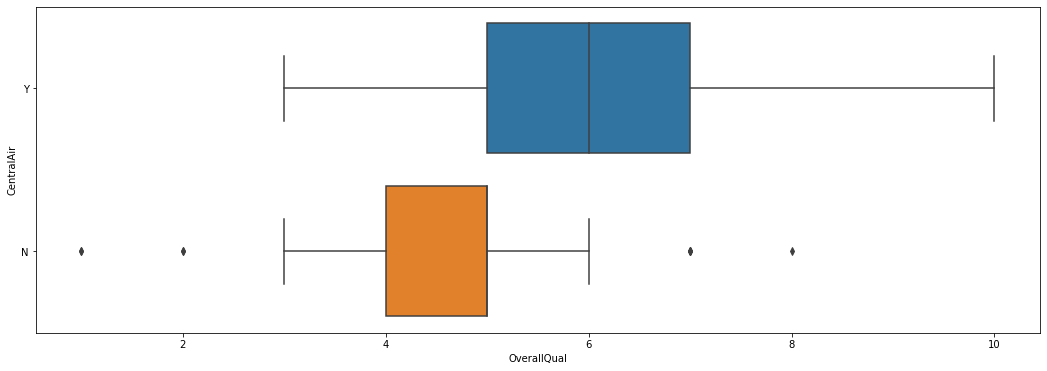

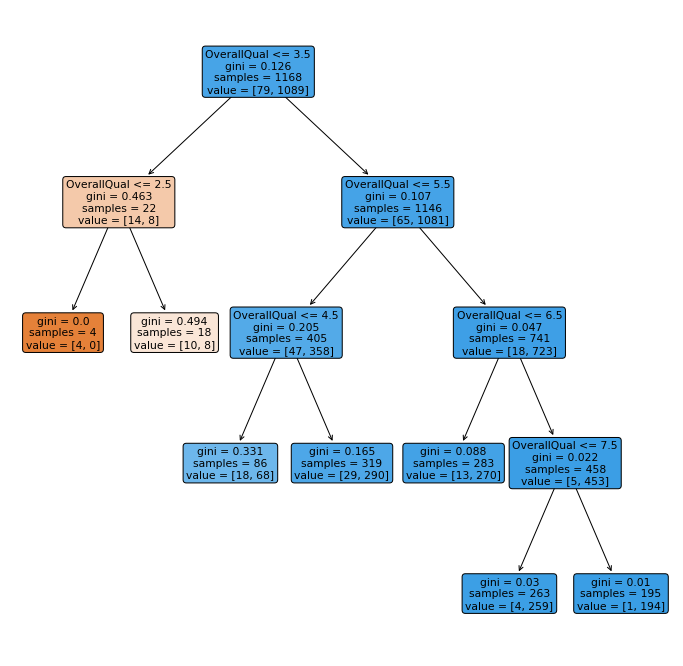

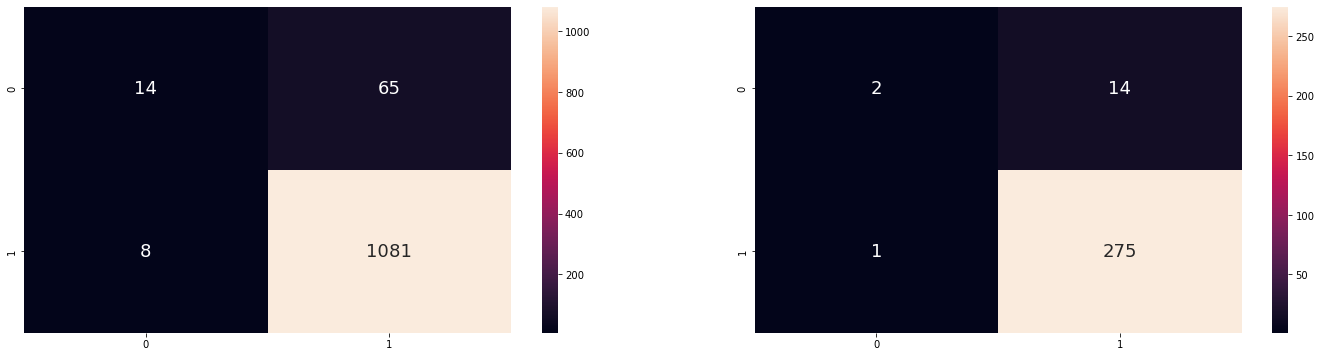

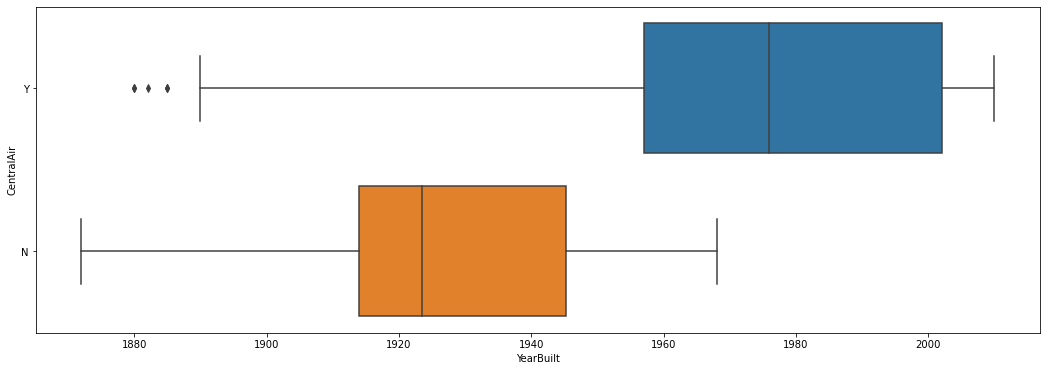

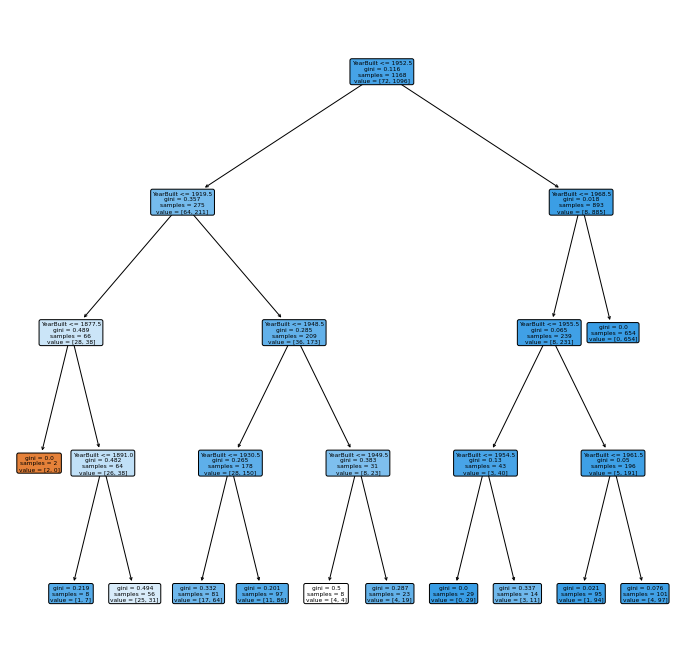

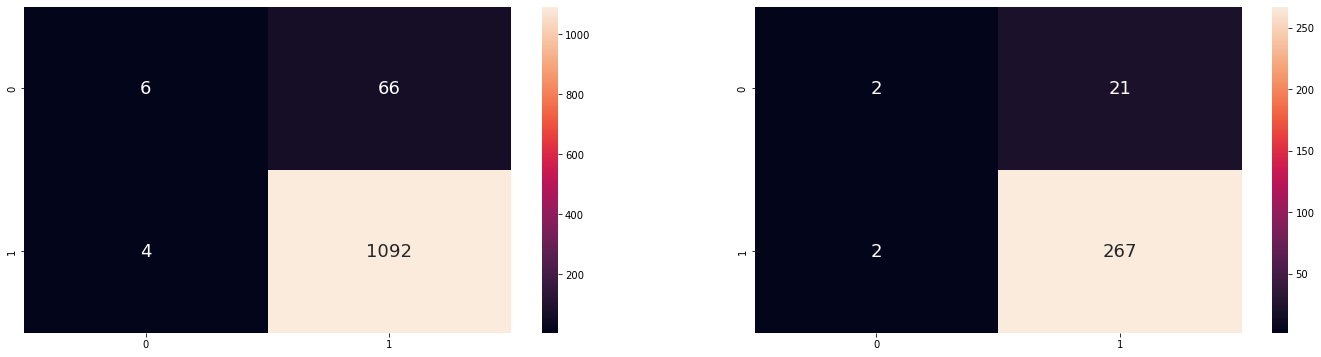

In [36]:
air = pd.DataFrame(df["CentralAir"])
items = ["OverallQual","YearBuilt"]
for metric in items:
    metric_train, metric_test, air_train, air_test = split(pd.DataFrame(df[metric]), air, test_size=0.2)
    trainDF = pd.concat([metric_train, air_train], axis = 1).reindex(metric_train.index)

    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = metric, y = "CentralAir", data = trainDF, orient = "h")
    
    dectree = DecisionTreeClassifier(max_depth = 4)
    dectree.fit(metric_train, air_train)

    f = plt.figure(figsize=(12,12))
    plot_tree(dectree, filled=True, rounded=True, 
    feature_names=[metric], 
    class_names=["False", "True"])
    
    air_train_pred = dectree.predict(metric_train)
    air_test_pred = dectree.predict(metric_test)

    f, axes = plt.subplots(1, 2, figsize=(24, 6))
    
    print("Metrics for {}: ".format(metric))

    print("Train Accuracy \t:", dectree.score(metric_train, air_train))
    sb.heatmap(confusion_matrix(air_train, air_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[0])

    print("Test Accuracy \t:", dectree.score(metric_test, air_test))
    matrix = confusion_matrix(air_test, air_test_pred)
    sb.heatmap(matrix, 
               annot = True, fmt=".0f", annot_kws={"size": 18},ax=axes[1])

    print("False positive rate: {}".format(matrix[0][1]/(matrix[0][1]+matrix[0][0])))
    print("False negative rate: {}".format(matrix[1][0]/(matrix[1][0]+matrix[1][1])))
    
    

    print("---".join(["---" for i in range(20)]))
    

# Qn 3

[Text(642.816, 587.0880000000001, 'SalePrice <= 107750.0\ngini = 0.132\nsamples = 1168\nvalue = [83, 1085]\nclass = True'),
 Text(294.624, 456.624, 'SalePrice <= 79450.0\ngini = 0.486\nsamples = 120\nvalue = [50, 70]\nclass = True'),
 Text(107.13600000000001, 326.1600000000001, 'SalePrice <= 45650.0\ngini = 0.375\nsamples = 20\nvalue = [15, 5]\nclass = False'),
 Text(53.568000000000005, 195.69600000000003, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(160.704, 195.69600000000003, 'SalePrice <= 52250.0\ngini = 0.415\nsamples = 17\nvalue = [12, 5]\nclass = False'),
 Text(107.13600000000001, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = True'),
 Text(214.27200000000002, 65.23200000000008, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]\nclass = False'),
 Text(482.112, 326.1600000000001, 'SalePrice <= 106125.0\ngini = 0.455\nsamples = 100\nvalue = [35, 65]\nclass = True'),
 Text(374.97600000000006, 195.69600000000003, 'SalePrice <= 98150.0\ngini = 0.4

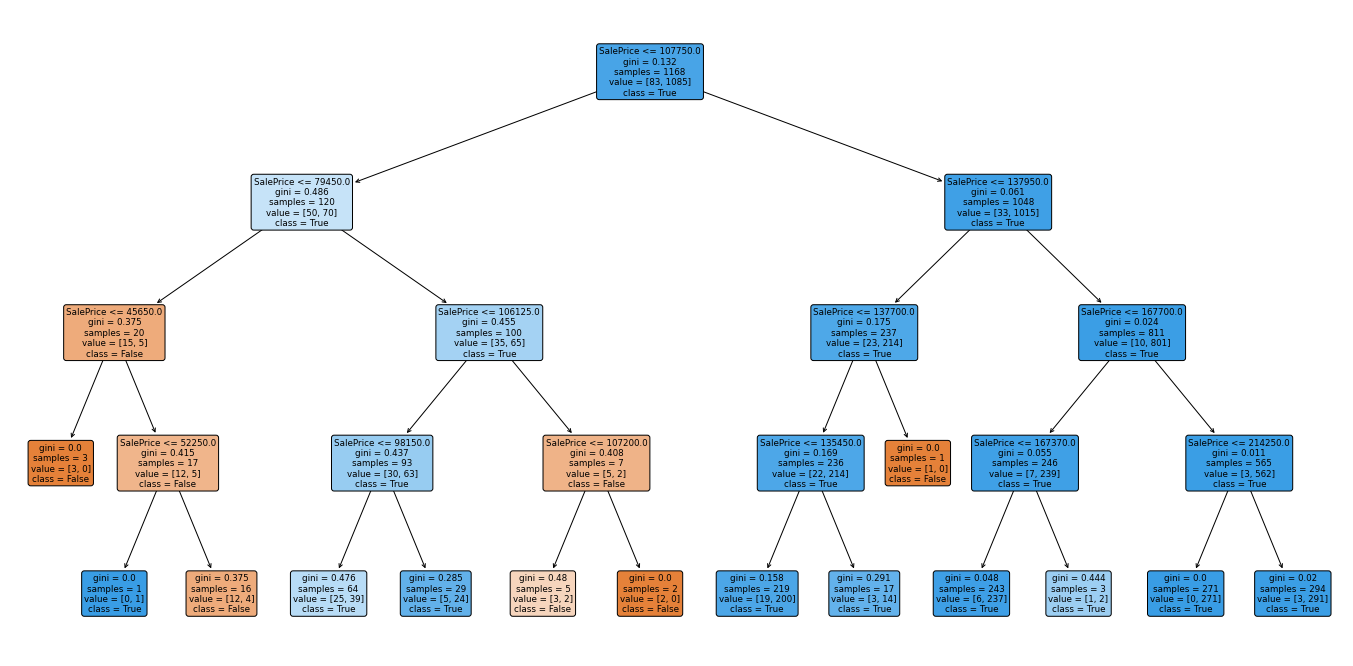

In [41]:
air = pd.DataFrame(df["CentralAir"])
price = pd.DataFrame(df["SalePrice"])
price_train, price_test, air_train, air_test = split(price, air, test_size=0.2, random_state=42)
dectree4 = DecisionTreeClassifier(max_depth = 4)
dectree4.fit(price_train, air_train)

f = plt.figure(figsize=(24,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["False", "True"])


### When sale price is between 79450 and 98150, gini coefficient is 0.476 and has value [25,39]

In [30]:
trainDF =  pd.concat([price_train, air_train], axis = 1).reindex(price_spc.index)
node = trainDF[(trainDF["SalePrice"]>=79450) & (trainDF["SalePrice"]<=98150)]
node

,SalePrice,CentralAir
638,85000,Y
514,96500,N
342,87500,N
210,98000,N
1137,94000,N
...,...,...
1378,83000,Y
632,82500,Y
1038,97000,Y
98,83000,N


In [39]:
False_pos = node[node["CentralAir"]=='N']
False_pos

,SalePrice,CentralAir
514,96500,N
342,87500,N
210,98000,N
1137,94000,N
1013,85000,N
438,90350,N
352,95000,N
88,85000,N
1376,91000,N
325,87000,N
